In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
column_names = [
    "animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator",
    "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "class_type"
]
data = pd.read_csv("zoo.data",names=column_names)
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [28]:
# Separate features and target variable
X = data.drop(columns=["class_type"])
y = data["class_type"]

In [29]:
# Preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
X["animal_name"] = label_encoder.fit_transform(X["animal_name"])

In [30]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Define the Classification model
classification_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Compile the model
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
## Train the model
history = classification_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.3492 - loss: -0.2934 - val_accuracy: 0.5714 - val_loss: -0.6920
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3492 - loss: -0.9520 - val_accuracy: 0.5714 - val_loss: -1.1887
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4000 - loss: -1.6285 - val_accuracy: 0.5714 - val_loss: -1.6925
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3453 - loss: -2.6262 - val_accuracy: 0.5714 - val_loss: -2.2297
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3688 - loss: -3.1826 - val_accuracy: 0.5714 - val_loss: -2.7963
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3727 - loss: -3.8099 - val_accuracy: 0.5714 - val_loss: -3.4201
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3219 - loss: -5.0032 - val_accuracy: 0.5714 - val_loss: -4.1030
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3570 - loss: -5.9833 - val_accuracy: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3375 - loss: -569.0347 - val_accuracy: 0.5714 - val_loss: -406.4952
Epoch 51/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3414 - loss: -595.9360 - val_accuracy: 0.5714 - val_loss: -435.4244
Epoch 52/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3570 - loss: -656.3840 - val_accuracy: 0.5714 - val_loss: -465.6799
Epoch 53/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3922 - loss: -638.7870 - val_accuracy: 0.5714 - val_loss: -497.3476
Epoch 54/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3961 - loss: -669.1075 - val_accuracy: 0.5714 - val_loss: -530.2047
Epoch 55/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3375 - loss: -733.6904 - val_accuracy: 0.5714 - val_loss: -565.6852
Epoch 56/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4117 - loss: -746.4470 - val_accuracy: 0.5714 - val_loss: -602.5124
Epoch 57/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3844 - loss: -839

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3727 - loss: -5325.4170 - val_accuracy: 0.5714 - val_loss: -4200.7363
Epoch 99/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3453 - loss: -5792.8896 - val_accuracy: 0.5714 - val_loss: -4346.0327
Epoch 100/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4039 - loss: -5733.3511 - val_accuracy: 0.5714 - val_loss: -4494.2930


In [35]:
# Evaluate the model on the testing set
loss, accuracy = classification_model.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5714 - loss: -4494.2930
Classification Loss: -4494.29296875
Classification Accuracy: 0.5714285969734192


In [37]:
# Generate ROC curve
y_pred_prob =classification_model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


ValueError: multiclass format is not supported

In [38]:
# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

ValueError: multi_class must be in ('ovo', 'ovr')

In [39]:
# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 1  0  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.57      1.00      0.73        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.57        21
   macro avg       0.10      0.17      0.12        21
weighted avg       0.33      0.57      0.42        21



C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

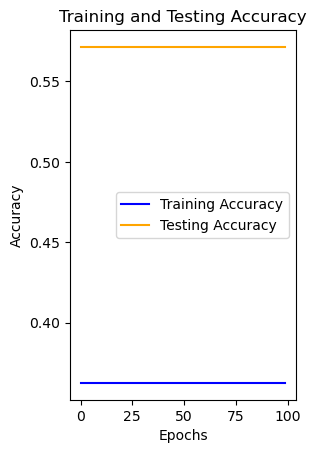

In [41]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

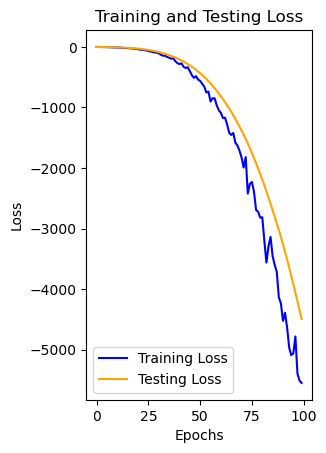

In [42]:
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [43]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [44]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
y_test_bin=label_binarize(y_test,classes=np.unique(y_test))
y_score = classifier.predict_proba(X_test)
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(7):
    fpr[i],tpr[i],_=roc_curve(y_test_bin[:,i],y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    for i in range(7):
        plt.plot(fpr[i],tpr[i],label=f"class{i}(AUC={roc_auc[i]:0.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [45]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict probabilities
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyError: 'key of type tuple not found and not a MultiIndex'